Pymaceuticals Analysis
 
As observed in the "Tumor Response to Treatment" graph and the "Tumor Changes Over 45 Days" summary graph, only two of the ten drugs used in the study, were successful at shrinking tumors over the 45 day period. Ramicane had the best results with Capomulin being a close second.

Unfortunately, as observed in the "Metastatic Response to Treatment" graph, all drugs resulted in metastatic growth sites with the Ketapril drug resulting in more sites even than the placebo at the end of the 45 days.

Although Ramicane had the largest decrease in tumor size and the smallest amount of metastatic sites, as seen in the "Survival Rates of Mice in Study" graph, it was the drug, Capomulin, which had the highest survival rate for the mice. Twenty-one of the twenty-five mice were still alive at the end of the 45 days. I think its worth mentioning that twenty of the twenty-five mice that took Ramican were also still alive at the end of the 45 days. All of the other drugs saw at least eleven mice die during the study period.


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_clinical_data_df = pd.merge(mouse_df, clinical_df, how = 'right', on ="Mouse ID")

# Display the data table for preview
merged_clinical_data_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_df = merged_clinical_data_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

                                     
# Convert to DataFrame
tumor_volume_df = pd.DataFrame(tumor_volume_df)
                                              

# Preview DataFrame
tumor_volume_df.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = merged_clinical_data_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_sem = pd.DataFrame(tumor_volume_sem)

# Preview DataFrame
tumor_volume_sem.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames pivot method?
tumor_volume_df = tumor_volume_df.reset_index()
tumor_volume_df_pivot = tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_df_pivot.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames pivot method?
tumor_volume_sem = tumor_volume_sem.reset_index()
tumor_volume_sem_pivot = tumor_volume_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_sem_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


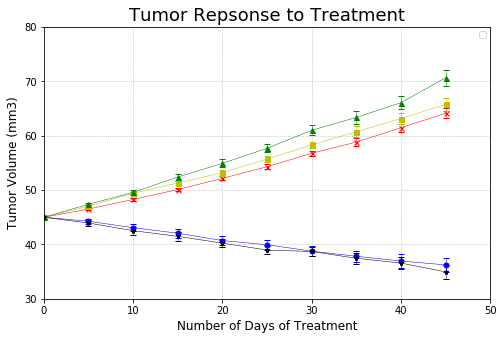

In [6]:
# Generate the Plot (with Error Bars)-use different time point values for x and drugs as y
#error equal to tumor vol sem pivot df and the drug. don't forget marker and color for graph
#b:blue, g:green, r:red, c:cyan, m:magenta, y:yellow, k:black, w:white
#No handles with labels found to put in legend-remedy??

plt.figure(figsize=(8,5))
plt.errorbar(tumor_volume_df_pivot.index, tumor_volume_df_pivot["Capomulin"], yerr=tumor_volume_sem_pivot["Capomulin"],
            marker="o", color="b", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(tumor_volume_df_pivot.index, tumor_volume_df_pivot["Ceftamin"], yerr=tumor_volume_sem_pivot["Ceftamin"],
            marker="x", color="r", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(tumor_volume_df_pivot.index, tumor_volume_df_pivot["Infubinol"], yerr=tumor_volume_sem_pivot["Infubinol"],
            marker="s", color="y", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(tumor_volume_df_pivot.index, tumor_volume_df_pivot["Ketapril"], yerr=tumor_volume_sem_pivot["Ketapril"],
            marker="^", color="g", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(tumor_volume_df_pivot.index, tumor_volume_df_pivot["Ramicane"], yerr=tumor_volume_sem_pivot["Ramicane"],
            marker="*", color="k", markersize=5, linewidth=0.50, capsize=3)

plt.ylim(30,80)
plt.xlim(0, 50)
plt.title("Tumor Repsonse to Treatment", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Number of Days of Treatment", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(loc="best", fontsize="small", frameon=True)


# Save the Figure
plt.savefig("TumorVol_Fig1.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_site_df = merged_clinical_data_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

                                     
# Convert to DataFrame
Metastatic_site_df = pd.DataFrame(Metastatic_site_df)
                                              

# Preview DataFrame
Metastatic_site_df.head(5)



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_site_sem = merged_clinical_data_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
Metastatic_site_sem = pd.DataFrame(Metastatic_site_sem)

# Preview DataFrame
Metastatic_site_sem.head(12)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588

In [9]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_site_df = Metastatic_site_df.reset_index()
Metastatic_site_df_pivot = Metastatic_site_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
Metastatic_site_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_site_sem = Metastatic_site_sem.reset_index()
Metastatic_site_sem_pivot = Metastatic_site_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
Metastatic_site_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


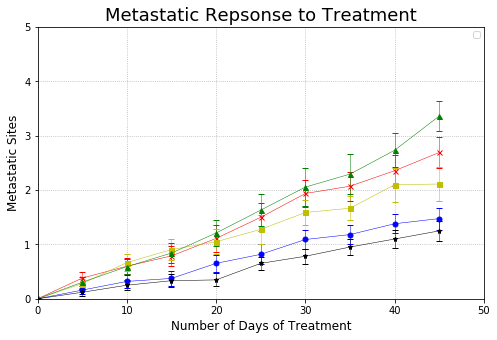

In [11]:
# Generate the Plot (with Error Bars)
#used same plot info from tumor response plot-needed to tweak y limit. still have the no handle error so
#my legend is still not showing-remedy? ASK TA/Class why not picking up drug names for legend

plt.figure(figsize=(8,5))
plt.errorbar(Metastatic_site_df_pivot.index, Metastatic_site_df_pivot["Capomulin"], yerr=Metastatic_site_sem_pivot["Capomulin"],
            marker="o", color="b", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(Metastatic_site_df_pivot.index, Metastatic_site_df_pivot["Ceftamin"], yerr=Metastatic_site_sem_pivot["Ceftamin"],
            marker="x", color="r", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(Metastatic_site_df_pivot.index, Metastatic_site_df_pivot["Infubinol"], yerr=Metastatic_site_sem_pivot["Infubinol"],
            marker="s", color="y", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(Metastatic_site_df_pivot.index, Metastatic_site_df_pivot["Ketapril"], yerr=Metastatic_site_sem_pivot["Ketapril"],
            marker="^", color="g", markersize=5, linewidth=0.50, capsize=3)
plt.errorbar(Metastatic_site_df_pivot.index, Metastatic_site_df_pivot["Ramicane"], yerr=Metastatic_site_sem_pivot["Ramicane"],
            marker="*", color="k", markersize=5, linewidth=0.50, capsize=3)

plt.ylim(0,5)
plt.xlim(0, 50)
plt.title("Metastatic Repsonse to Treatment", fontsize=18)
plt.ylabel("Metastatic Sites", fontsize=12)
plt.xlabel("Number of Days of Treatment", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(loc="best", fontsize="small", frameon=True)

# Save the Figure
plt.savefig("MetaSites_Fig1.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse_survival_df = merged_clinical_data_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
Mouse_survival_df = pd.DataFrame({"Mice Count": Mouse_survival_df})

# Preview DataFrame
Mouse_survival_df.head()


Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_survival_df = Mouse_survival_df.reset_index()
Mouse_survival_df_pivot = Mouse_survival_df.pivot(index="Timepoint", columns="Drug")["Mice Count"]

# Preview the Data Frame
Mouse_survival_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


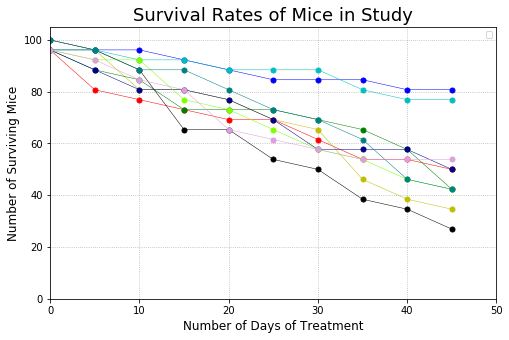

In [14]:
# Generate the Plot (Accounting for percentages)-WHY IS MOUSE COUNT 26 IN DF BUT 25 WHEN .COUNT?? ASK TA

plt.figure(figsize=(8,5))
plt.plot(100*Mouse_survival_df_pivot["Capomulin"]/26, marker="o", color="b", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Ceftamin"]/26, marker="o", color="r", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Infubinol"]/26, marker="o", color="y", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Ketapril"]/26, marker="o", color="g", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Propriva"]/26, marker="o", color="k", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Ramicane"]/26, marker="o", color="c", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Naftisol"]/26, marker="o", color="darkblue", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Placebo"]/26, marker="o", color="chartreuse", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Stelasyn"]/26, marker="o", color="teal", markersize=5, linewidth=0.50)
plt.plot(100*Mouse_survival_df_pivot["Zoniferol"]/26, marker="o", color="plum", markersize=5, linewidth=0.50)

plt.ylim(0,105)
plt.xlim(0, 50)
plt.title("Survival Rates of Mice in Study", fontsize=18)
plt.ylabel("Number of Surviving Mice", fontsize=12)
plt.xlabel("Number of Days of Treatment", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(loc="best", fontsize="small", frameon=True)

# Save the Figure
plt.savefig("Micesurvival_Fig1.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes OF TUMOR VOLUME for each drug for the 45 days #note using [44] 
#as index didn't work
#how do i fix the format..rounding


tumor_change_percent_df = (((tumor_volume_df_pivot.iloc[-1])/(tumor_volume_df_pivot.iloc[0]))-1)*100

# Display the data to confirm
tumor_change_percent_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [16]:
# Store all Relevant Percent Changes into a Tuple (immutable object, sequences like lists but in ())
# I put 2 drugs that had shrinking tumors together in the beginning of tuple 
drug_percent_changes = (tumor_change_percent_df["Capomulin"],
                        tumor_change_percent_df["Ramicane"],
                        tumor_change_percent_df["Ceftamin"],
                        tumor_change_percent_df["Infubinol"],
                        tumor_change_percent_df["Ketapril"],
                        tumor_change_percent_df["Naftisol"],
                        tumor_change_percent_df["Placebo"],
                        tumor_change_percent_df["Propriva"],
                        tumor_change_percent_df["Stelasyn"],
                        tumor_change_percent_df["Zoniferol"],
                       )
drug_percent_changes

(-19.47530266789417,
 -22.32090046276667,
 42.516491855897456,
 46.12347172785187,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320636,
 52.085134287899024,
 46.57975086509525)

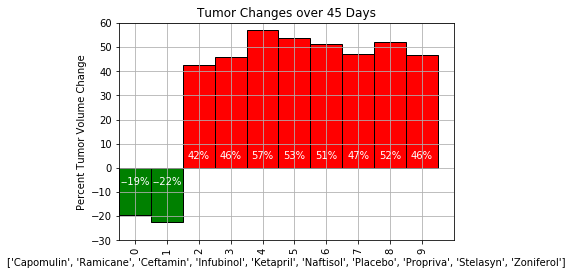

In [17]:
# Splice the data between passing and failing drugs
drug_list=["Capomulin", "Ramicane", "Ceftamin", "Infubinol",
           "Ketapril", "Naftisol", "Placebo", "Propriva",
           "Stelasyn", "Zoniferol"]

fig, ax = plt.subplots()
ind = np.arange(len(drug_percent_changes)) #index equal to the drug% chg tuple
width=1
drugsPass = ax.bar(ind[0:2], drug_percent_changes[0:2], width, color='g', ec='k')#WHY ISN'T INDEX 1 SHOWING UP????

drugsFail = ax.bar(ind[2:], drug_percent_changes[2:], width, color='r', ec='k')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Percent Tumor Volume Change')
ax.set_xlabel(drug_list)
#note i kept getting an error message when i listed out the drug names in the xlabel function and
#got around it by setting a drug_list variable and then putting that variable in the xlabel command

ax.set_title("Tumor Changes over 45 Days")
ax.set_xticks(ind)#xtick is 0 to 10 to match the length of index, not sure how to make it drug list 
plt.xticks(rotation=90)
ax.set_autoscaley_on(False)#???
ax.set_ylim([-30, 60])
ax.set_xlim([-0.5, 10])
plt.grid()

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha="center", va="bottom", color="w")
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%%' % int(height),
                ha="center", va="bottom", color="w")


# Call functions to implement the function calls
autolabelPass(drugsPass)
autolabelFail(drugsFail)

# Save the Figure
plt.savefig("Sum_fig1.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [19]:

#I reordered the drug list so the names would match the findings
#I also reordered the names in the drug percent changes tuple so the 
#first two would be the successful drugs and thus show up on the chart first
#and the other drugs would show up after